In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('iris/iris.csv')

# View structure
print("Shape:", df.shape)
print(df.head())
print(df.info())

Shape: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
print(df['species'].unique())

['setosa' 'versicolor' 'virginica']


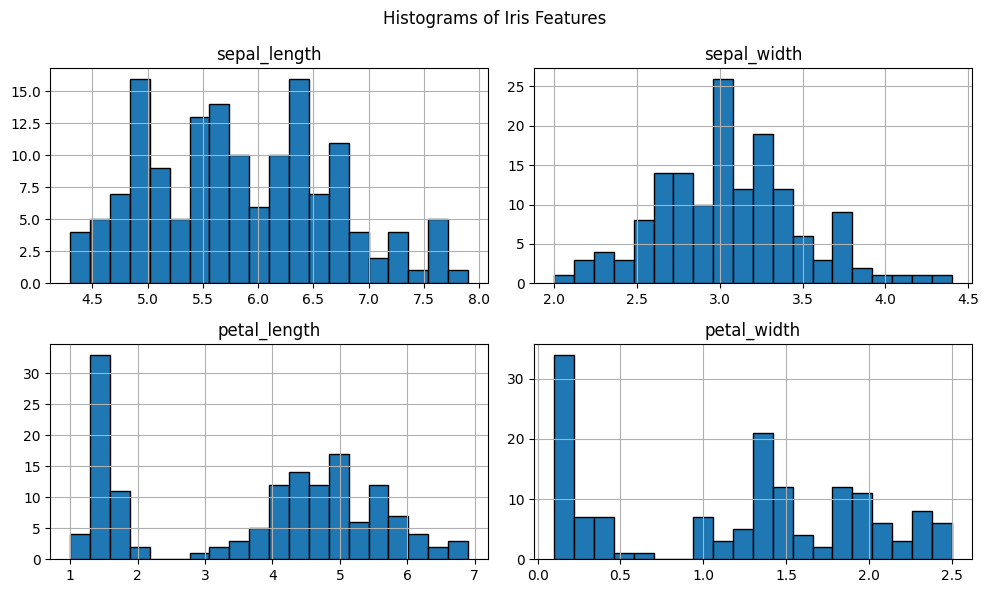

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].hist(
    bins=20, figsize=(10, 6), edgecolor='black')
plt.suptitle("Histograms of Iris Features")
plt.tight_layout()
plt.show()


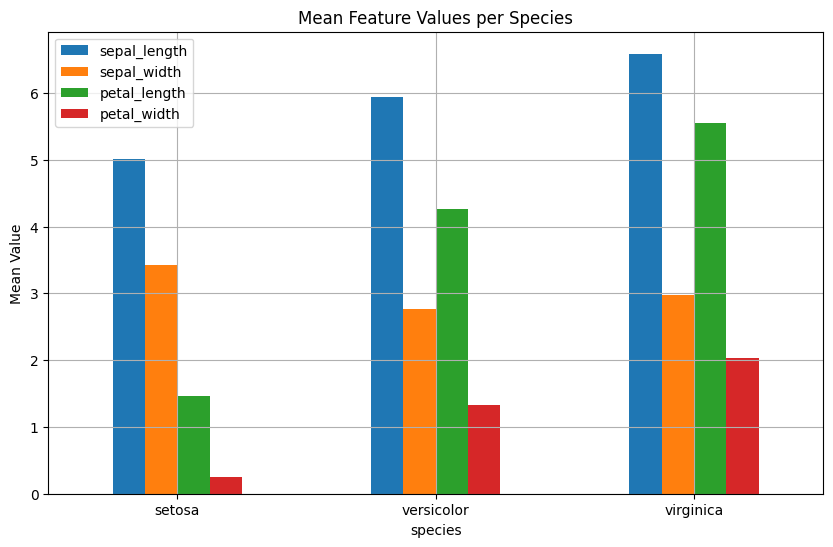

In [10]:
df.groupby('species').mean().plot(kind='bar', figsize=(10, 6))
plt.title("Mean Feature Values per Species")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


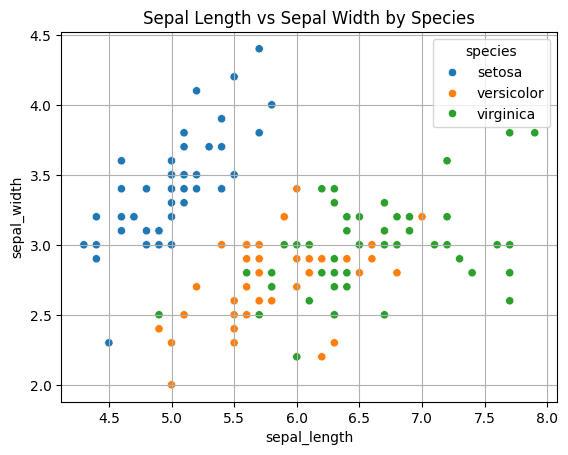

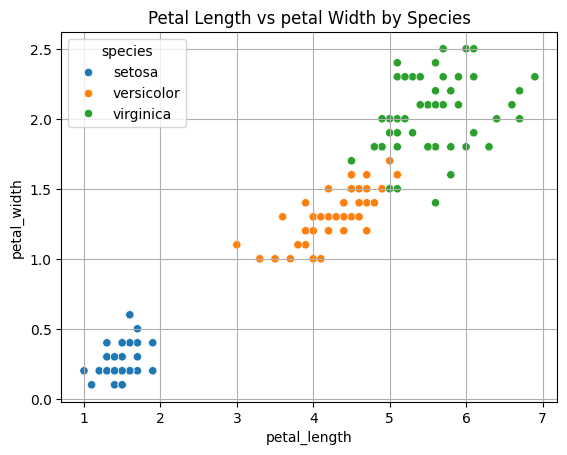

In [12]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title("Sepal Length vs Sepal Width by Species")
plt.grid(True)
plt.show()

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.title("Petal Length vs petal Width by Species")
plt.grid(True)
plt.show()



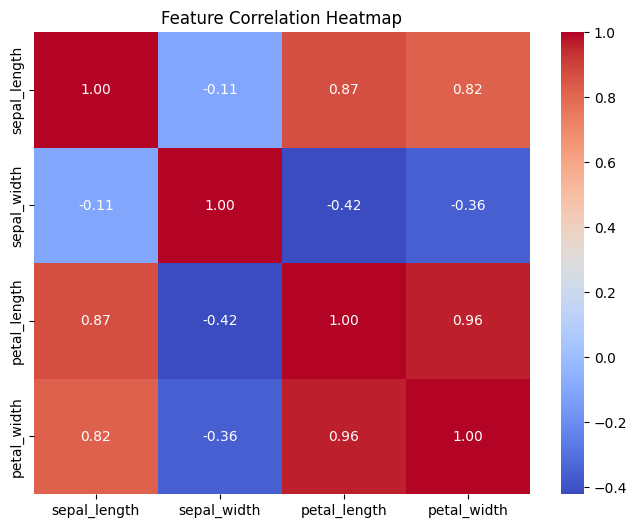

In [13]:
correlation = df.drop('species', axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


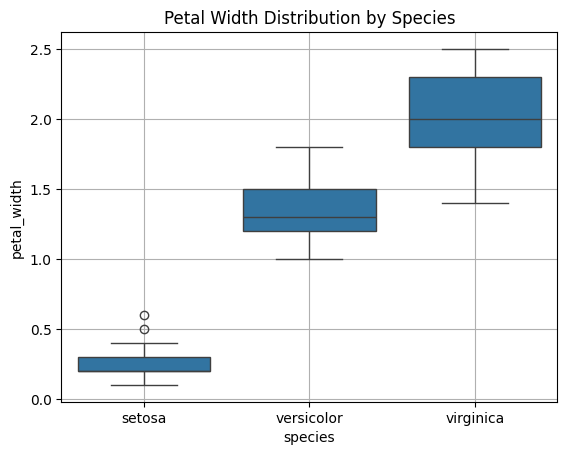

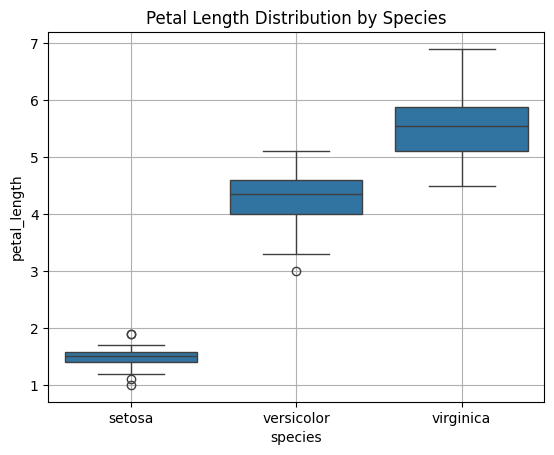

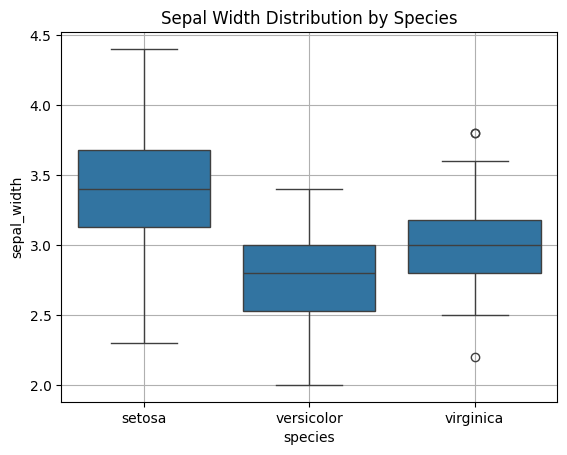

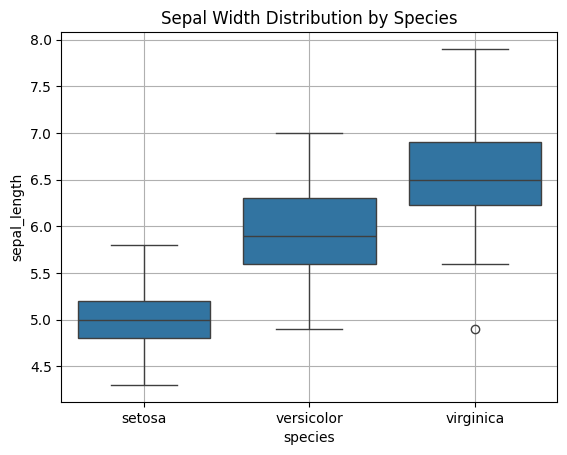

In [16]:
sns.boxplot(x='species', y='petal_width', data=df)
plt.title("Petal Width Distribution by Species")
plt.grid(True)
plt.show()

sns.boxplot(x='species', y='petal_length', data=df)
plt.title("Petal Length Distribution by Species")
plt.grid(True)
plt.show()

sns.boxplot(x='species', y='sepal_width', data=df)
plt.title("Sepal Width Distribution by Species")
plt.grid(True)
plt.show()

sns.boxplot(x='species', y='sepal_length', data=df)
plt.title("Sepal Width Distribution by Species")
plt.grid(True)
plt.show()



In [17]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

In [20]:
df['species_encoded'].unique()

array([0, 1, 2])

In [ ]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

df_processed = pd.concat([X_scaled_df, df['species_encoded']], axis=1)

print("Processed Data:")
print(df_processed.head())


✅ Processed Data:
   sepal_length  sepal_width  petal_length  petal_width  species_encoded
0     -0.900681     1.032057     -1.341272    -1.312977                0
1     -1.143017    -0.124958     -1.341272    -1.312977                0
2     -1.385353     0.337848     -1.398138    -1.312977                0
3     -1.506521     0.106445     -1.284407    -1.312977                0
4     -1.021849     1.263460     -1.341272    -1.312977                0
